# Analysis

---
## E1: Function Name Generation

C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\1207470754.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\1207470754.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\1207470754.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(


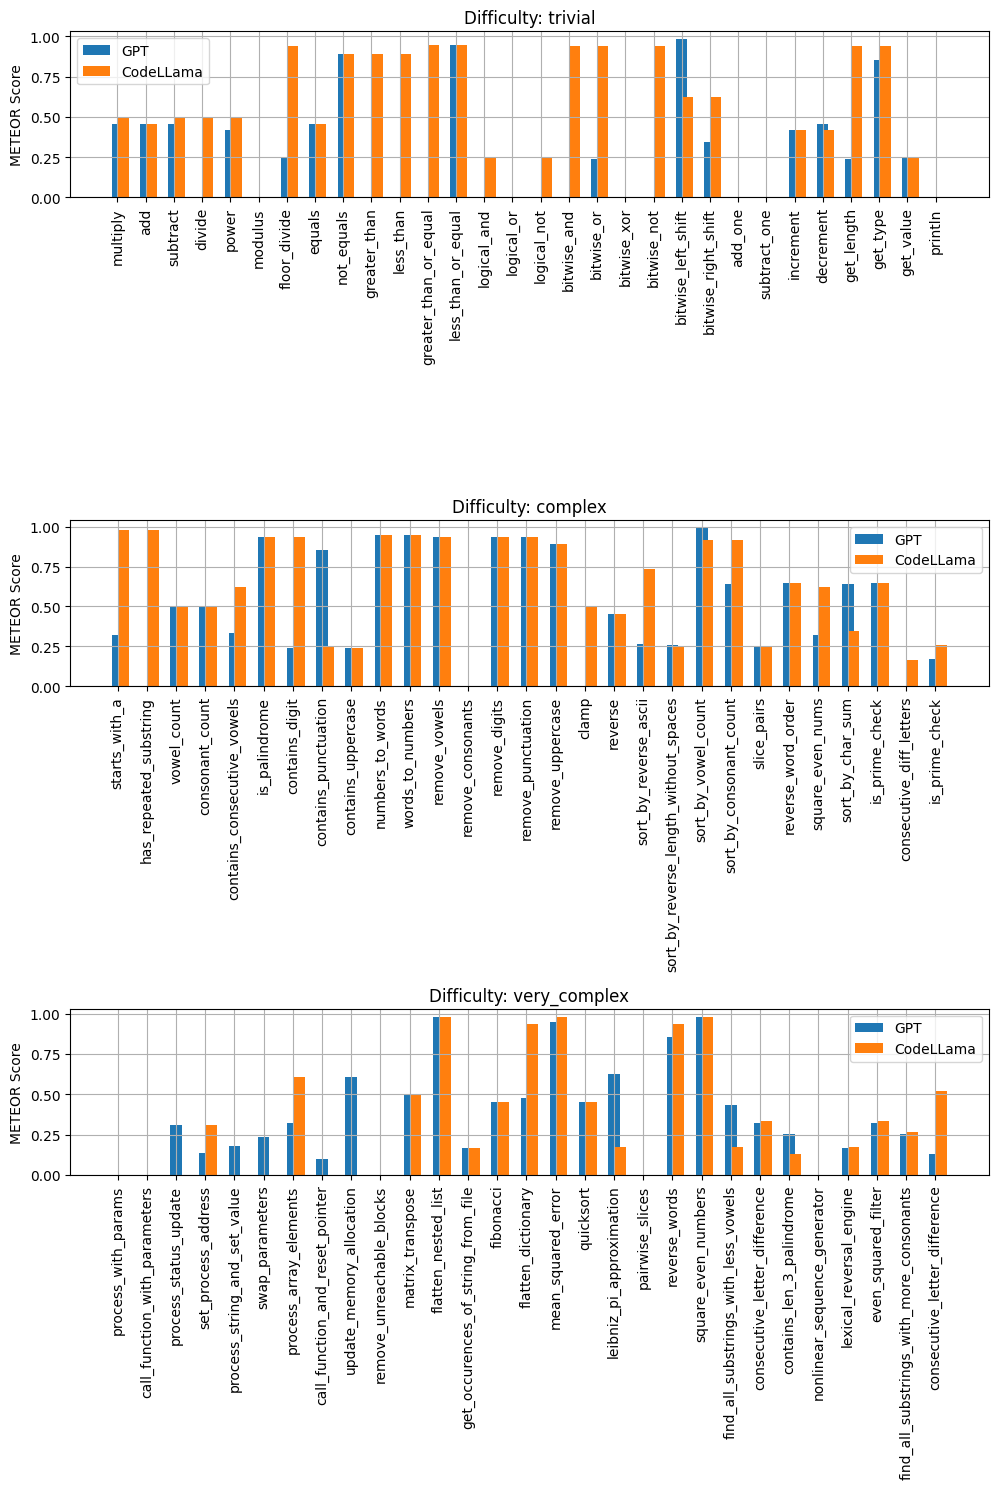

Average METEOR Score of GPT:  0.3700025068656213
Average METEOR Score of CodeLLama:  0.49560082411678846


In [59]:
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt

difficulties = []
actual_function_names = []
gpt_function_names = []
codellama_function_names = []
bleu_scores_gpt = []
meteor_scores_gpt = []
bleu_scores_codellama = []
meteor_scores_codellama = []


# Seperate function name into words based on _ or capitals
def split_words(name):
    words = []
    current_word = ""
    for i in range(len(name)):
        if name[i] == "_":
            if current_word != "":
                words.append(current_word)
            current_word = ""
        elif name[i].isupper():
            if current_word != "":
                words.append(current_word)
            current_word = name[i]
        else:
            current_word += name[i]
    if current_word != "":
        words.append(current_word)
    return words


# Read the file and return the content
data = open("results/E1_results.csv").read().split("\n")
for line in data:
    fields = line.split(",")
    if fields[0] == "":
        continue
    difficulties.append(fields[0])
    actual_function_names.append(fields[1])
    gpt_function_names.append(fields[2])
    codellama_function_names.append(fields[3])
    actual_response = split_words(fields[1])
    gpt_response = split_words(fields[2])
    codellama_response = split_words(fields[3])
    meteor_scores_gpt.append(meteor_score([actual_response], gpt_response))
    meteor_scores_codellama.append(meteor_score([actual_response], codellama_response))

# Plot the METEOR scores of gpt and codellama (both scores next to each other) in three bar charts grouped by the three difficulty levels with labels given by actual function names
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    ax[i].bar(
        actual_function_names[i * 30 : (i + 1) * 30],
        meteor_scores_gpt[i * 30 : (i + 1) * 30],
        width=0.4,
        align="center",
        label="GPT",
    )
    ax[i].bar(
        actual_function_names[i * 30 : (i + 1) * 30],
        meteor_scores_codellama[i * 30 : (i + 1) * 30],
        width=0.4,
        align="edge",
        label="CodeLLama",
    )
    ax[i].set_title("Difficulty: " + difficulties[i * 30])
    ax[i].set_ylabel("METEOR Score")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xticklabels(
        actual_function_names[i * 30 : (i + 1) * 30], rotation="vertical"
    )
plt.tight_layout()
plt.show()

# Print the average METEOR scores of GPT and CodeLLama
print("Average METEOR Score of GPT: ", sum(meteor_scores_gpt) / len(meteor_scores_gpt))
print(
    "Average METEOR Score of CodeLLama: ",
    sum(meteor_scores_codellama) / len(meteor_scores_codellama),
)

---
## E2: Documentation Generation

Unfortunately documentation generation is not easy to do programmatically. For this reason evaluations for this task where performed manually.

While GPT starts it's documentation paragraphs directly, CodeLlama starts every response with "Here is a documentation paragraph for the function:" or some variation. When it is told not to do this, it starts complaining of ethical concerns. This makes it difficult to generate code for purposes of documentation but also any application with strict format requirements.

While GPT seems happy to stop once it is has said it's piece, CodeLlam likes to start explaining it's explanation if it has extra characters. The following example shows this in the short function "add":

Here is a documentation paragraph for the function:```/** * Adds two numbers together. * * @param {number} a - The first number to add. * @param {number} b - The second number to add. * @returns {number} The sum of the two numbers. */function add(a b) {  return a + b;}```This function takes two numbers `a` and `b` as input parameters and returns their sum. The `@param` tags describe the input parameters indicating their data type and their purpose. The `@returns` tag describes the output of the function indicating its data type and

CodeLlama will also add examples to it's documentation. This is a nice feature but it is not always necessary.

In all, the GPT responses are more concise and to the point. CodeLlama's responses are more verbose and sometimes redundant. Both models were able to generate satisfactory documentation for the functions.


---
## E3: Code Generation

C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\4181501493.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\4181501493.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(
C:\Users\jaspe\AppData\Local\Temp\ipykernel_2268\4181501493.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(


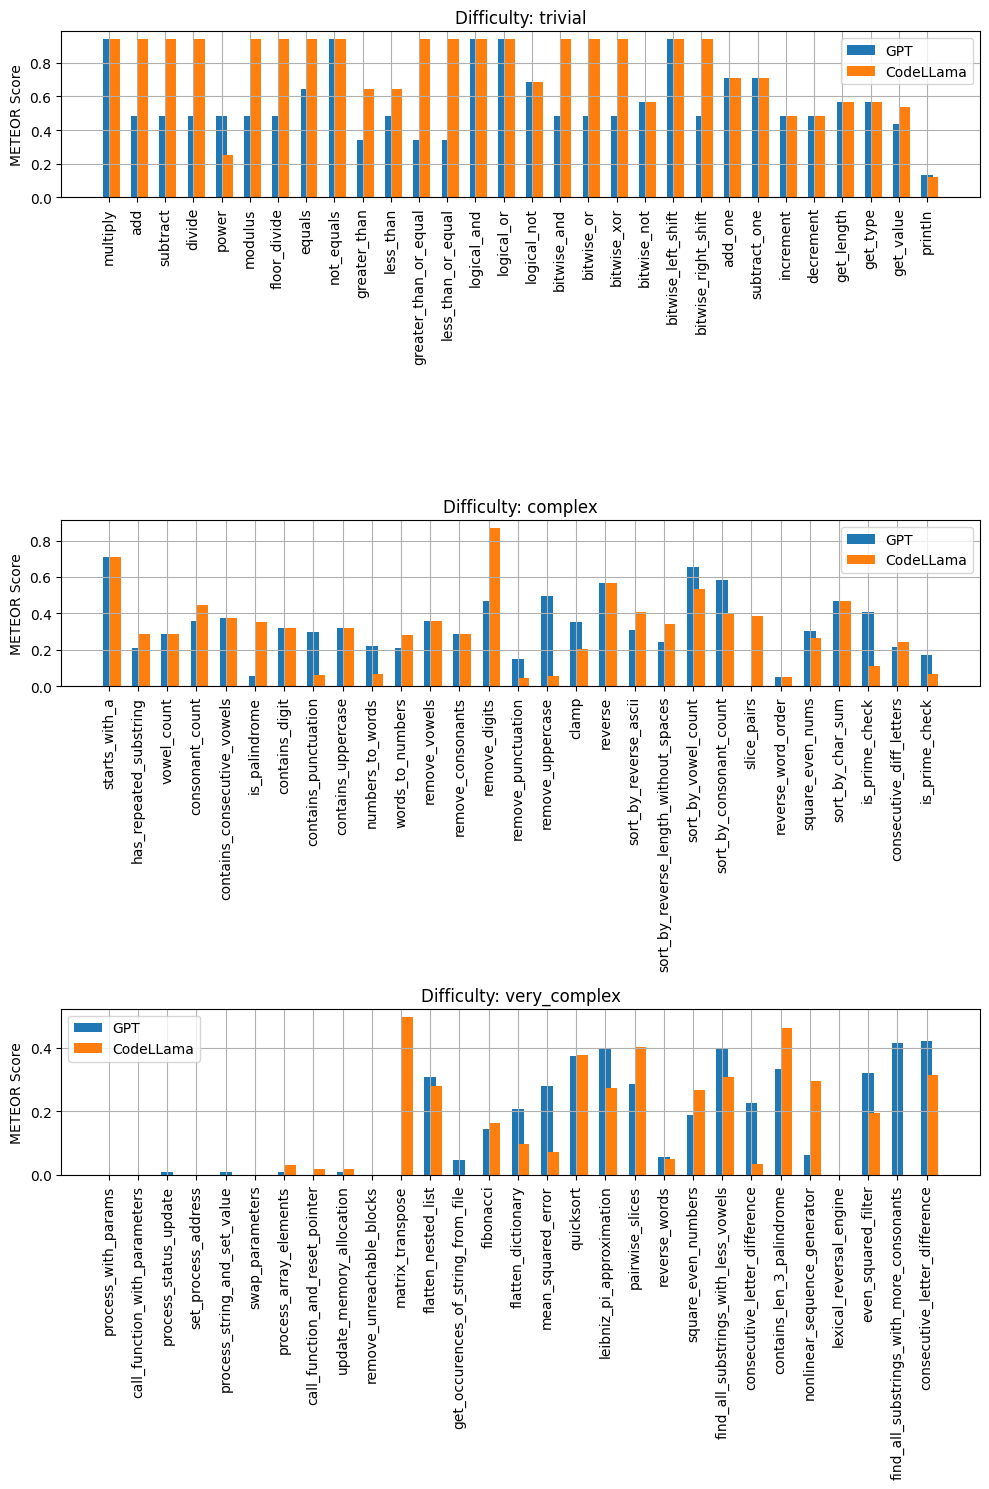

Average METEOR Score of GPT:  0.3500281421881369
Average METEOR Score of CodeLLama:  0.40448822651865757


In [75]:
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt

difficulties = []
actual_function_names = []
gpt_functions = []
codellama_functions = []
meteor_scores_gpt = []
meteor_scores_codellama = []
actual_functions = []


# Read the file and return the content
data = open("results/E3_results.csv").read().split("\n")
for line in data:
    fields = line.split(",")
    if fields[0] == "":
        continue
    difficulties.append(fields[0])
    actual_function_names.append(fields[1])
    gpt_function = "".join(fields[2].split(":")[1:])
    codellama_function = "".join(fields[3].split(":")[1:])
    gpt_functions.append(gpt_function)
    codellama_functions.append(codellama_function)
    actual_functions.append(fields[5])

    meteor_scores_gpt.append(
        meteor_score([fields[5].split(" ")], gpt_function.split(" "))
    )
    meteor_scores_codellama.append(
        meteor_score([fields[5].split(" ")], codellama_function.split(" "))
    )


# Plot the CodeBLEU scores of gpt and codellama (both scores next to each other) in three bar charts grouped by the three difficulty levels with labels given by actual function names
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    ax[i].bar(
        actual_function_names[i * 30 : (i + 1) * 30],
        meteor_scores_gpt[i * 30 : (i + 1) * 30],
        width=0.4,
        align="center",
        label="GPT",
    )
    ax[i].bar(
        actual_function_names[i * 30 : (i + 1) * 30],
        meteor_scores_codellama[i * 30 : (i + 1) * 30],
        width=0.4,
        align="edge",
        label="CodeLLama",
    )
    ax[i].set_title("Difficulty: " + difficulties[i * 30])
    ax[i].set_ylabel("METEOR Score")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xticklabels(
        actual_function_names[i * 30 : (i + 1) * 30], rotation="vertical"
    )
plt.tight_layout()
plt.show()

# Print the average METEOR scores of GPT and CodeLLama
print("Average METEOR Score of GPT: ", sum(meteor_scores_gpt) / len(meteor_scores_gpt))
print(
    "Average METEOR Score of CodeLLama: ",
    sum(meteor_scores_codellama) / len(meteor_scores_codellama),
)